# Random forest regressor for predicting the deep conversion value of peptide.

### This notebook is try to develop a regression model to predict the DC value through random forest regressor. 
### It is divided into following two parts.  

#### 1. Predicting the deep conversion value of tetra peptides with only the feature of amino acid sequences.
#### 2. Predicting the deep conversion value of tetra peptides with the festures of both sequence and vhse property. 

### Part 1: Predicting the deep conversion value of tetra peptides with only the feature of amino acid sequences.

In [2]:
import pandas as pd ## Load the library

In [3]:
## read csv file into dataframe
df = pd.read_csv (r'C:\Users\wu2\48Dis\Dataset.csv')

In [4]:
df.head()

,seq,label,log.label,z1.1,z1.2,z1.3,z2.1,z2.2,z2.3,z3.1,...,vhse3.7,vhse3.8,vhse4.1,vhse4.2,vhse4.3,vhse4.4,vhse4.5,vhse4.6,vhse4.7,vhse4.8
0,TVPT,0.002273,-2.643473,0.92,-2.09,-1.40,-2.69,-2.53,-1.29,-1.22,...,-0.19,3.56,-0.34,-0.51,-0.55,-1.06,-0.06,-0.01,-0.79,0.39
1,VYVY,0.002380,-2.623463,-2.69,-2.53,-1.29,-1.39,2.32,0.01,-2.69,...,-0.24,-0.03,0.61,1.60,1.17,0.73,0.53,0.25,-0.96,-0.52
2,KNML,0.001945,-2.711181,2.84,1.41,-3.14,3.22,1.45,0.84,-2.49,...,-0.86,-0.68,1.36,0.07,0.26,-0.80,0.22,-1.37,0.08,-0.62
3,KTIA,0.001151,-2.939057,2.84,1.41,-3.14,0.92,-2.09,-1.40,-4.44,...,-0.16,-0.13,0.15,-1.11,-1.35,-0.92,0.02,-0.91,0.36,-0.48
4,LHFR,0.002031,-2.692215,-4.19,-1.03,-0.98,2.41,1.74,1.11,-4.92,...,-1.33,-0.20,-1.47,1.45,1.24,1.27,1.55,1.47,1.30,0.83


In [5]:
df.shape

(67278, 47)

#### The sequence column is converted to numerial features with dummies coder. 

In [7]:
df_seq=df[['seq']]

In [8]:
df_seq.head()

,seq
0,TVPT
1,VYVY
2,KNML
3,KTIA
4,LHFR


In [9]:
df_seq = df_seq.seq.str.split("",expand=True,)

In [10]:
df_seq.head()

,0,1,2,3,4,5
0,,T,V,P,T,
1,,V,Y,V,Y,
2,,K,N,M,L,
3,,K,T,I,A,
4,,L,H,F,R,


In [11]:
df_seq.columns = df_seq.columns.astype(str)

In [12]:
df_seq.rename(columns={"2": "s2", "1": "s1","3":"s3","4":"s4"}, inplace=True)

In [13]:
df_seq=df_seq[['s1','s2','s3','s4']]

In [14]:
df_seq.head()

,s1,s2,s3,s4
0,T,V,P,T
1,V,Y,V,Y
2,K,N,M,L
3,K,T,I,A
4,L,H,F,R


In [15]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

In [22]:
df1=encode_and_bind(df_seq,'s1')

In [27]:
df2=encode_and_bind(df_seq,'s2')
df2.drop(columns=['s1', 's2','s3','s4'],inplace=True)

In [28]:
df3=encode_and_bind(df_seq,'s3')
df3.drop(columns=['s1', 's2','s3','s4'],inplace=True)

In [29]:
df4=encode_and_bind(df_seq,'s4')
df4.drop(columns=['s1', 's2','s3','s4'],inplace=True)

In [30]:
df4.head()

,s4_A,s4_C,s4_D,s4_E,s4_F,s4_G,s4_H,s4_I,s4_K,s4_L,s4_M,s4_N,s4_P,s4_Q,s4_R,s4_S,s4_T,s4_V,s4_W,s4_Y
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


#### New dataframe with converted sequence feature is merged. 

In [96]:
df_merge1=pd.merge(df1,df2,left_index=True, right_index=True)

In [97]:
df_merge2=pd.merge(df3,df4,left_index=True, right_index=True)

In [98]:
df_merge3=pd.merge(df_merge1,df_merge2,left_index=True, right_index=True)

In [99]:
df5=df[['label']]

In [100]:
df_merge=pd.merge(df_merge3,df5,left_index=True, right_index=True)

In [101]:
df_merge.head()

,s1,s2,s3,s4,s1_A,s1_C,s1_D,s1_E,s1_F,s1_G,...,s4_N,s4_P,s4_Q,s4_R,s4_S,s4_T,s4_V,s4_W,s4_Y,label
0,T,V,P,T,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.002273
1,V,Y,V,Y,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.002380
2,K,N,M,L,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.001945
3,K,T,I,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.001151
4,L,H,F,R,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.002031


In [102]:
X = df_merge.drop(['s1', 's2','s3','s4','label'], axis=1)
y = df_merge.label

#### Random forest regressor model is used to train and test the dataset. 

In [103]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestRegressor

In [104]:
import numpy as np

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
#Build RF model
RFR = RandomForestRegressor(n_estimators=150, random_state=0)

#Randomly spilt dataset to test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 )
#Train RFR
RFR.fit(X_train, y_train)
#RFR prediction result
y_pred = RFR.predict(X_test)

In [106]:
print(RFR.predict(X_test[:5]))

[0.00174682 0.00208554 0.00199631 0.00122493 0.00269807]


In [107]:
print(X_test[:5])

       s1_A  s1_C  s1_D  s1_E  s1_F  s1_G  s1_H  s1_I  s1_K  s1_L  ...  s4_M  \
15391     1     0     0     0     0     0     0     0     0     0  ...     0   
24195     0     0     0     1     0     0     0     0     0     0  ...     0   
19160     0     0     0     0     0     0     0     0     0     0  ...     0   
66952     0     0     0     0     0     0     0     0     0     0  ...     0   
3184      0     0     0     0     0     0     0     0     0     0  ...     0   

       s4_N  s4_P  s4_Q  s4_R  s4_S  s4_T  s4_V  s4_W  s4_Y  
15391     0     0     0     0     0     0     0     0     0  
24195     0     1     0     0     0     0     0     0     0  
19160     0     0     0     0     1     0     0     0     0  
66952     0     0     0     0     1     0     0     0     0  
3184      0     0     0     0     1     0     0     0     0  

[5 rows x 80 columns]


#### A function is defined to inverted converting the dummy code to amino acid sequence. 

In [110]:
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

In [113]:
df_Re = undummify(X_test[:10])

In [115]:
df_Re.head(10)

,s1,s2,s3,s4
15391,A,N,F,K
24195,E,S,L,P
19160,M,S,M,S
66952,P,S,C,S
3184,Y,D,A,S
17498,K,P,Q,T
14554,D,H,K,E
5576,V,T,D,E
56172,W,M,S,R
5207,T,P,N,V


In [116]:
print(RFR.predict(X_test[:10]))

[0.00174682 0.00208554 0.00199631 0.00122493 0.00269807 0.00270428
 0.00140412 0.00189133 0.00605841 0.0012395 ]


In [118]:
df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_comparison

,Actual,Predicted
15391,0.001686,0.001747
24195,0.001452,0.002086
19160,0.002548,0.001996
66952,0.000036,0.001225
3184,0.002948,0.002698
...,...,...
22708,0.001388,0.002092
48700,0.002988,0.001158
20543,0.003234,0.001601
56656,0.001603,0.001470


No handles with labels found to put in legend.


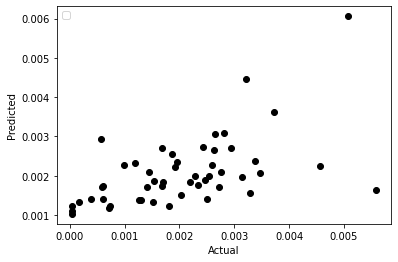

In [123]:
## Make a plot to compare the actual and predicted DC values for the first 50 test rows. 
import matplotlib.pyplot as plt

x = df_comparison.Actual.head(50)
y = df_comparison.Predicted.head(50)

plt.plot(x, y, 'o', color='black');
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend(loc='upper left')
plt.show()

#### Try to input a tetra peptide sequence and predict the DC value. 

In [151]:
from sklearn.preprocessing import OneHotEncoder

In [178]:
#### This module is used to converted nested list to a flatten one. 
def flatten(x):
    result = []
    for el in x:
        if hasattr(el, "__iter__") and not isinstance(el, str):
            result.extend(flatten(el))
        else:
            result.append(el)
    return result

print(flatten(["junk",["nested stuff"],[],[[]]]))

['junk', 'nested stuff']


In [195]:
from numpy import argmax
# define input string
data = input("Enter four amino acid:-")
print(data)
# define universe of possible input values
alphabet = 'acdefghiklmnpqrstvwy'
# define a mapping of chars to integers
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))
# integer encode input data
integer_encoded = [char_to_int[char] for char in data]
print(integer_encoded)
# one hot encode
onehot_encoded = []
L=[]
for value in integer_encoded:
	letter = [0 for _ in range(len(alphabet))]
	letter[value] = 1
	onehot_encoded.append(letter)
print(onehot_encoded)
L= flatten(onehot_encoded)
# calculate DC value
print(RFR.predict([L])) ## Predict the DC value with amino acid sequence. 

Enter four amino acid:-adew
adew
[0, 2, 3, 18]
[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]
[0.00185933]


### Part 2. Predicting the DC value of tetra peptides with the festures of both sequence and vhse property. 

In [216]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\wu2\Miniconda3\envs\earth-analytics-python\python.exe -m pip install --upgrade pip' command.


In [227]:
df_vhse = pd.read_excel (r'C:\Users\wu2\48Dis\vhse.xlsx') ##load the vhse code for amino acid. 

In [228]:
df_vhse.head()

,seq,vhse1,vhse2,vhse3,vhse4,vhse5,vhse6,vhse7,vhse8
0,A,0.15,−1.11,−1.35,−0.92,0.02,−0.91,0.36,−0.48
1,R,−1.47,1.45,1.24,1.27,1.55,1.47,1.30,0.83
2,N,−0.99,0.00,−0.37,0.69,−0.55,0.85,0.73,−0.80
3,D,−1.15,0.67,−0.41,−0.01,−2.68,1.31,0.03,0.56
4,C,0.18,−1.67,−0.46,−0.21,0.00,1.20,−1.61,−0.19


In [229]:
df_vhse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   seq     20 non-null     object
 1   vhse1   20 non-null     object
 2   vhse2   20 non-null     object
 3   vhse3   20 non-null     object
 4   vhse4   20 non-null     object
 5   vhse5   20 non-null     object
 6   vhse6   20 non-null     object
 7   vhse7   20 non-null     object
 8   vhse8   20 non-null     object
dtypes: object(9)
memory usage: 1.5+ KB


In [237]:
df_vhse['vhse1'] = df_vhse['vhse1'].str.replace('[^\x00-\x7F]+','-')

<ipython-input-237-e410f1fe5846>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_vhse['vhse1'] = df_vhse['vhse1'].str.replace('[^\x00-\x7F]+','-')


In [242]:

df_vhse['vhse2'] = df_vhse['vhse2'].str.replace('[^\x00-\x7F]+','-')
df_vhse['vhse3'] = df_vhse['vhse3'].str.replace('[^\x00-\x7F]+','-')

<ipython-input-242-a1532b07d458>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_vhse['vhse2'] = df_vhse['vhse2'].str.replace('[^\x00-\x7F]+','-')
<ipython-input-242-a1532b07d458>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_vhse['vhse3'] = df_vhse['vhse3'].str.replace('[^\x00-\x7F]+','-')


In [243]:
df_vhse['vhse4'] = df_vhse['vhse4'].str.replace('[^\x00-\x7F]+','-')
df_vhse['vhse5'] = df_vhse['vhse5'].str.replace('[^\x00-\x7F]+','-')
df_vhse['vhse6'] = df_vhse['vhse6'].str.replace('[^\x00-\x7F]+','-')
df_vhse['vhse7'] = df_vhse['vhse7'].str.replace('[^\x00-\x7F]+','-')
df_vhse['vhse8'] = df_vhse['vhse8'].str.replace('[^\x00-\x7F]+','-')

<ipython-input-243-6b09e0d3f2c5>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_vhse['vhse4'] = df_vhse['vhse4'].str.replace('[^\x00-\x7F]+','-')
<ipython-input-243-6b09e0d3f2c5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_vhse['vhse5'] = df_vhse['vhse5'].str.replace('[^\x00-\x7F]+','-')
<ipython-input-243-6b09e0d3f2c5>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_vhse['vhse6'] = df_vhse['vhse6'].str.replace('[^\x00-\x7F]+','-')
<ipython-input-243-6b09e0d3f2c5>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_vhse['vhse7'] = df_vhse['vhse7'].str.replace('[^\x00-\x7F]+','-')
<ipython-input-243-6b09e0d3f2c5>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_vhse['vhse8'] = df_vhse['vhse8'].str.replace('[^\x00-\x7F]+',

In [244]:

df_vhse['vhse2'] = df_vhse['vhse2'].astype(np.float64)
df_vhse['vhse3'] = df_vhse['vhse3'].astype(np.float64)
df_vhse['vhse4'] = df_vhse['vhse4'].astype(np.float64)
df_vhse['vhse5'] = df_vhse['vhse5'].astype(np.float64)
df_vhse['vhse6'] = df_vhse['vhse6'].astype(np.float64)
df_vhse['vhse7'] = df_vhse['vhse7'].astype(np.float64)
df_vhse['vhse8'] = df_vhse['vhse8'].astype(np.float64)

In [247]:
df_vhse.head()

,seq,vhse1,vhse2,vhse3,vhse4,vhse5,vhse6,vhse7,vhse8
0,A,0.15,-1.11,-1.35,-0.92,0.02,-0.91,0.36,-0.48
1,R,-1.47,1.45,1.24,1.27,1.55,1.47,1.30,0.83
2,N,-0.99,0.00,-0.37,0.69,-0.55,0.85,0.73,-0.80
3,D,-1.15,0.67,-0.41,-0.01,-2.68,1.31,0.03,0.56
4,C,0.18,-1.67,-0.46,-0.21,0.00,1.20,-1.61,-0.19


In [259]:
df_vhse.drop(['vhse_code'],axis=1,inplace=True)

In [260]:
df_vhse.head()

,seq,vhse1,vhse2,vhse3,vhse4,vhse5,vhse6,vhse7,vhse8
0,A,0.15,-1.11,-1.35,-0.92,0.02,-0.91,0.36,-0.48
1,R,-1.47,1.45,1.24,1.27,1.55,1.47,1.30,0.83
2,N,-0.99,0.00,-0.37,0.69,-0.55,0.85,0.73,-0.80
3,D,-1.15,0.67,-0.41,-0.01,-2.68,1.31,0.03,0.56
4,C,0.18,-1.67,-0.46,-0.21,0.00,1.20,-1.61,-0.19


In [264]:
df_vhse['code'] = df_vhse[df_vhse.columns[1:]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

In [265]:
df_vhse.head()

,seq,vhse1,vhse2,vhse3,vhse4,vhse5,vhse6,vhse7,vhse8,code
0,A,0.15,-1.11,-1.35,-0.92,0.02,-0.91,0.36,-0.48,"0.15,-1.11,-1.35,-0.92,0.02,-0.91,0.36,-0.48"
1,R,-1.47,1.45,1.24,1.27,1.55,1.47,1.30,0.83,"-1.47,1.45,1.24,1.27,1.55,1.47,1.3,0.83"
2,N,-0.99,0.00,-0.37,0.69,-0.55,0.85,0.73,-0.80,"-0.99,0.0,-0.37,0.69,-0.55,0.85,0.73,-0.8"
3,D,-1.15,0.67,-0.41,-0.01,-2.68,1.31,0.03,0.56,"-1.15,0.67,-0.41,-0.01,-2.68,1.31,0.03,0.56"
4,C,0.18,-1.67,-0.46,-0.21,0.00,1.20,-1.61,-0.19,"0.18,-1.67,-0.46,-0.21,0.0,1.2,-1.61,-0.19"


#### This module is a practise to convert a amino acid into its vhse values. 

In [296]:
## Find a way to convert input amino acid to vhse code. 
rename_dict = df_vhse.set_index('seq').to_dict()['code']
A1 = input("Provide A1 ")
for name, code in rename_dict.items():  # for name, code in dictionary.iteritems():  
    if name == A1:
        l1=code
        print(l1)
A2 = input("Provide A2 ")
for name, code in rename_dict.items():  # for name, code in dictionary.iteritems():  
    if name == A2:
        l2=code
        print(l2)
A3 = input("Provide A3 ")
for name, code in rename_dict.items():  # for name, code in dictionary.iteritems():  
    if name == A3:
        l3=code
A4 = input("Provide A4 ")
for name, code in rename_dict.items():  # for name, code in dictionary.iteritems():  
    if name == A4:
        l4=code 
        l5=l1+l2+l3+l4
        print(l5)

Provide A1 A
0.15,-1.11,-1.35,-0.92,0.02,-0.91,0.36,-0.48
Provide A2 R
-1.47,1.45,1.24,1.27,1.55,1.47,1.3,0.83
Provide A3 N
Provide A4 D
0.15,-1.11,-1.35,-0.92,0.02,-0.91,0.36,-0.48-1.47,1.45,1.24,1.27,1.55,1.47,1.3,0.83-0.99,0.0,-0.37,0.69,-0.55,0.85,0.73,-0.8-1.15,0.67,-0.41,-0.01,-2.68,1.31,0.03,0.56


#### Start building a dataframe with the vhse properties from the original dataset. 

In [301]:
last_n_column  = df.iloc[: , -32:] # Get those columns of vhse values. 

In [302]:
last_n_column.head()

,vhse1.1,vhse1.2,vhse1.3,vhse1.4,vhse1.5,vhse1.6,vhse1.7,vhse1.8,vhse2.1,vhse2.2,...,vhse3.7,vhse3.8,vhse4.1,vhse4.2,vhse4.3,vhse4.4,vhse4.5,vhse4.6,vhse4.7,vhse4.8
0,-0.34,-0.51,-0.55,-1.06,-0.06,-0.01,-0.79,0.39,0.76,-0.92,...,-0.19,3.56,-0.34,-0.51,-0.55,-1.06,-0.06,-0.01,-0.79,0.39
1,0.76,-0.92,-0.17,-1.91,0.22,-1.40,-0.24,-0.03,0.61,1.60,...,-0.24,-0.03,0.61,1.60,1.17,0.73,0.53,0.25,-0.96,-0.52
2,-1.17,0.70,0.70,0.80,1.64,0.67,1.63,0.13,-0.99,0.00,...,-0.86,-0.68,1.36,0.07,0.26,-0.80,0.22,-1.37,0.08,-0.62
3,-1.17,0.70,0.70,0.80,1.64,0.67,1.63,0.13,-0.34,-0.51,...,-0.16,-0.13,0.15,-1.11,-1.35,-0.92,0.02,-0.91,0.36,-0.48
4,1.36,0.07,0.26,-0.80,0.22,-1.37,0.08,-0.62,-0.43,-0.25,...,-1.33,-0.20,-1.47,1.45,1.24,1.27,1.55,1.47,1.30,0.83


In [304]:
df_merge_vhse=pd.merge(df_merge3,last_n_column,left_index=True, right_index=True)#merge sequence with vhse features.

In [305]:
df_merge_vhse=pd.merge(df_merge_vhse,df5,left_index=True, right_index=True)# merge features with the label.

In [306]:
df_merge_vhse.head() ## A new dataframe with both sequence and vhse features. 

,s1,s2,s3,s4,s1_A,s1_C,s1_D,s1_E,s1_F,s1_G,...,vhse3.8,vhse4.1,vhse4.2,vhse4.3,vhse4.4,vhse4.5,vhse4.6,vhse4.7,vhse4.8,label
0,T,V,P,T,0,0,0,0,0,0,...,3.56,-0.34,-0.51,-0.55,-1.06,-0.06,-0.01,-0.79,0.39,0.002273
1,V,Y,V,Y,0,0,0,0,0,0,...,-0.03,0.61,1.60,1.17,0.73,0.53,0.25,-0.96,-0.52,0.002380
2,K,N,M,L,0,0,0,0,0,0,...,-0.68,1.36,0.07,0.26,-0.80,0.22,-1.37,0.08,-0.62,0.001945
3,K,T,I,A,0,0,0,0,0,0,...,-0.13,0.15,-1.11,-1.35,-0.92,0.02,-0.91,0.36,-0.48,0.001151
4,L,H,F,R,0,0,0,0,0,0,...,-0.20,-1.47,1.45,1.24,1.27,1.55,1.47,1.30,0.83,0.002031


## Use both amino acid sequence and vhse as features for data training and model building. 

In [307]:
X = df_merge_vhse.drop(['s1', 's2','s3','s4','label'], axis=1) # set the features for training
y = df_merge_vhse.label

In [308]:
#Build RF model
RFR2 = RandomForestRegressor(n_estimators=150, random_state=0)# Build 150 decision tree. 

#Randomly spilt dataset to test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ) # Split training and test dataset, where 30 % used for testing. 
#Train RFR
RFR2.fit(X_train, y_train)
#RFR prediction result
y_pred = RFR2.predict(X_test)

In [309]:
print(RFR2.predict(X_test[:5]))

[0.00220251 0.0033566  0.00192131 0.00213282 0.00204725]


In [310]:
df_comparison2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_comparison2

,Actual,Predicted
19652,0.004804,0.002203
47235,0.001443,0.003357
60462,0.003873,0.001921
51313,0.001938,0.002133
34235,0.003250,0.002047
...,...,...
26524,0.002031,0.002838
49201,0.003693,0.003067
58379,0.004316,0.002475
1328,0.002307,0.002646


No handles with labels found to put in legend.


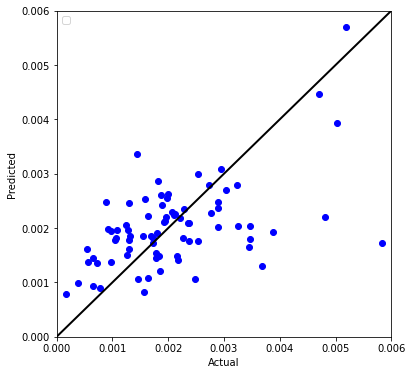

In [320]:
## Make a plot to compare the actual and predicted DC values for the first 80 test rows. 
import matplotlib.pyplot as plt

x = df_comparison2.Actual.head(80)
y = df_comparison2.Predicted.head(80)
plt.figure(figsize=(6,6))
plt.plot(x, y, 'o', color='blue');
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.xlim(0, 0.006)
plt.ylim(0, 0.006)
plt.plot([0, 1], [0, 1], color = 'black', linewidth = 2)
plt.legend(loc='upper left')
plt.show()

#### Try to input a tetra peptide sequence and predict the DC value.

In [334]:
from numpy import argmax
# define input string 
data = input("Enter four amino acid:-")
print(data)
# define universe of possible input values
alphabet = 'acdefghiklmnpqrstvwy'
# define a mapping of chars to integers
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))
# integer encode input data
integer_encoded = [char_to_int[char] for char in data]
print(integer_encoded)
# one hot encode
onehot_encoded = []
L=[]
test=[]
l6=[]
l1=[]
l2=[]
l3=[]
l4=[]
for value in integer_encoded:
	letter = [0 for _ in range(len(alphabet))]
	letter[value] = 1
	onehot_encoded.append(letter)
print(onehot_encoded)
L= flatten(onehot_encoded) ## Get the list of one hote code of amino acids
A1 = input("Provide A1 ")
for name, code in rename_dict.items():  # for name, code in dictionary.iteritems():  
    if name == A1:
        l1=code.split(',')
        print(l1)
A2 = input("Provide A2 ")
for name, code in rename_dict.items():  # for name, code in dictionary.iteritems():  
    if name == A2:
        l2=code.split(',')
        print(l2)
A3 = input("Provide A3 ")
for name, code in rename_dict.items():  # for name, code in dictionary.iteritems():  
    if name == A3:
        l3=code.split(',')
A4 = input("Provide A4 ")
for name, code in rename_dict.items():  # for name, code in dictionary.iteritems():  
    if name == A4:
        l4=code.split(',')
        l5=l1+l2+l3+l4
print(l5)
test_str =l5
res = [float(idx) for idx in test_str]
print(res)
test=L+res
print(test)
print(RFR2.predict([test]))

Enter four amino acid:-tvpt
tvpt
[16, 17, 12, 16]
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]
Provide A1 T
['-0.34', '-0.51', '-0.55', '-1.06', '0.01', '-0.01', '-0.79', '0.39']
Provide A2 V
['0.76', '-0.92', '0.17', '-1.91', '0.22', '-1.4', '-0.24', '-0.03']
Provide A3 P
Provide A4 T
['-0.34', '-0.51', '-0.55', '-1.06', '0.01', '-0.01', '-0.79', '0.39', '0.76', '-0.92', '0.17', '-1.91', '0.22', '-1.4', '-0.24', '-0.03', '0.22', '-0.17', '-0.5', '0.05', '-0.01', '-1.34', '-0.19', '3.56', '-0.34', '-0.51', '-0.55', '-1.06', '0.01', '-0.01', '-0.79', '0.39']
[-0.34, -0.51, -0.55, -1.06, 0.01, -0.01, -0.79, 0.39, 0.76, -0.92, 0.17, -1.91, 0.22, -1.4, -0.24, -0.03, 0.22, -0.17, -0.5, 0.05, -0.01, -1.34, -0.19, 3.56, -0.34, -0.51, -0.55, -1.06, 0.01, -0.01, -0.79, 0.39]
[0, 0, 0, 0, 0, 0, 

## Summary
#### One hot encoder method is used to convert the protein sequence into numerical features.  
#### Random forest regressor model was built for predicting the DC value from amino acid sequence with or without the vhse properties. 